In [4]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.4877 - accuracy: 0.4588 - val_loss: 1.2008 - val_accuracy: 0.5712
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1371 - accuracy: 0.5991 - val_loss: 1.0739 - val_accuracy: 0.6137
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9806 - accuracy: 0.6556 - val_loss: 0.9739 - val_accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8784 - accuracy: 0.6914 - val_loss: 0.9320 - val_accuracy: 0.6720
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8083 - accuracy: 0.7167 - val_loss: 0.9029 - val_accuracy: 0.6877
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7442 - accuracy: 0.7380 - val_loss: 0.8796 - val_accuracy: 0.7001
Epoch 7/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6922 - accuracy: 0.7567 - val_loss: 0.8514 -

313/313 - 1s - loss: 0.8802 - accuracy: 0.7181 - 1s/epoch - 4ms/step


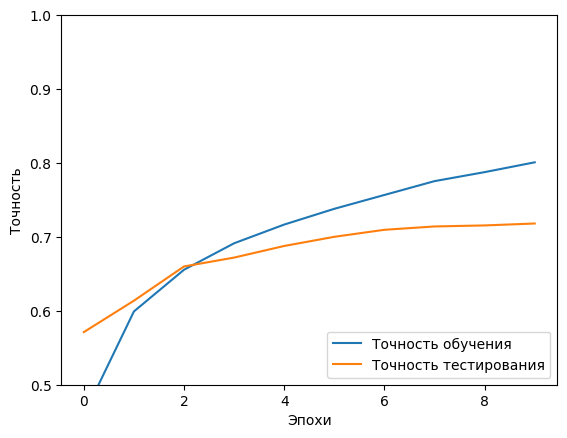

In [15]:
plt.plot(history.history['accuracy'], label='Точность обучения')
plt.plot(history.history['val_accuracy'], label = 'Точность тестирования')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [10]:
model.save('model.keras') 

313/313 [==============================] - 1s 4ms/step


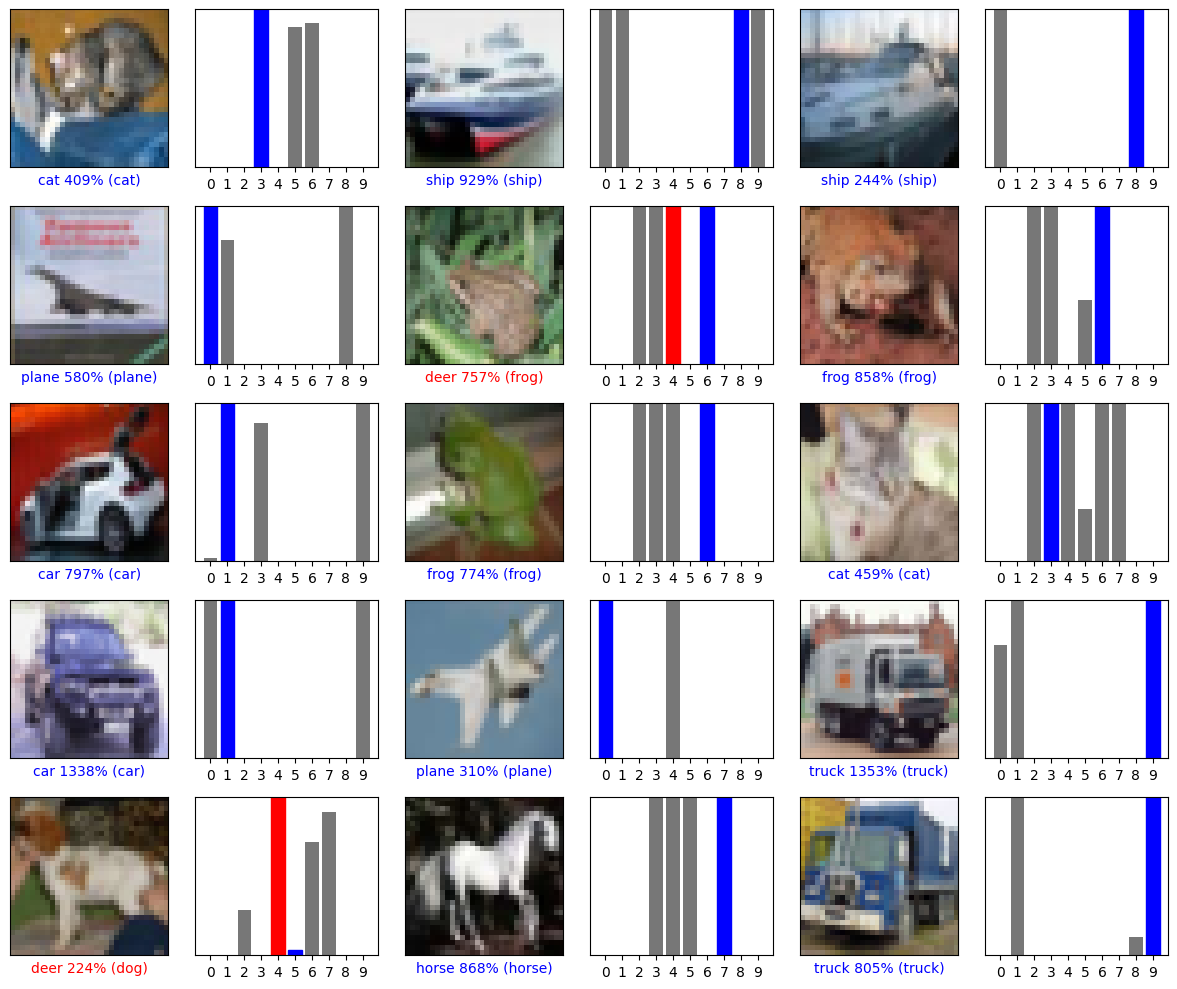

In [14]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
  true_label = true_label.flatten()
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label.flatten()  # Добавьте эту строку
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

